In [1]:
## Loading Libraries

import numpy as np,pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

%matplotlib inline

In [2]:
## Loading Dataset

market = pd.read_csv('Supermarket Purchase.csv')
market.head()

,Cust_id,AVG_Actual_price_12,Purchase_Value,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION
0,1,300.000000,1200.00,4,0.00,11
1,2,2563.282500,41012.52,16,78737.48,2
2,4,3510.000000,7020.00,2,780.00,4
3,8,4530.000000,13590.00,3,1510.00,1
4,9,2428.076923,33455.00,15,17445.00,6


In [3]:
## Initial checks 

market.info()
market.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 6 columns):
Cust_id                         702 non-null int64
AVG_Actual_price_12             702 non-null float64
Purchase_Value                  702 non-null float64
No_of_Items                     702 non-null int64
Total_Discount                  702 non-null float64
MONTH_SINCE_LAST_TRANSACTION    702 non-null int64
dtypes: float64(3), int64(3)
memory usage: 33.0 KB


,Cust_id,AVG_Actual_price_12,Purchase_Value,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,501.414530,2642.877917,19820.633305,10.720798,20806.339088,5.029915
std,295.756706,1879.138285,34639.752609,20.038311,58427.798572,3.562840
min,1.000000,22.500000,45.000000,1.000000,-3962.480000,1.000000
25%,245.750000,1238.750000,4200.000000,2.000000,0.000000,2.000000
50%,486.500000,2100.000000,8660.000000,4.000000,2599.250000,4.000000
75%,763.750000,3700.000000,21197.000000,10.000000,17433.750000,8.000000
max,1006.000000,10000.000000,302721.740000,172.000000,734349.820000,12.000000


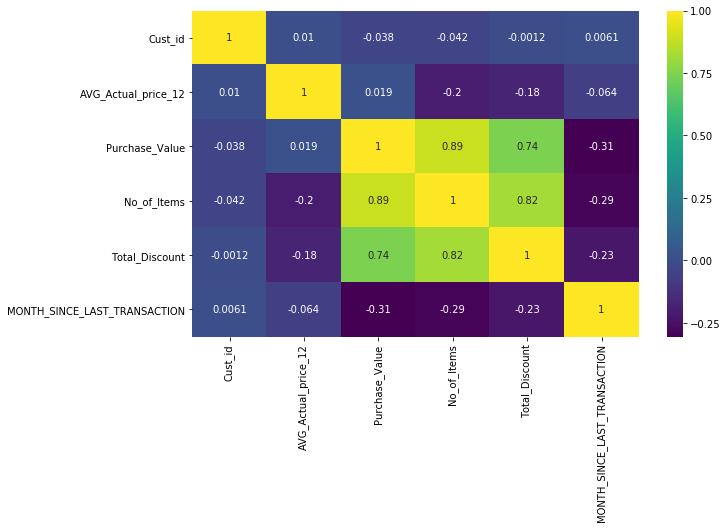

In [4]:
## Purchase Value is correlated with Number of Items and Discounts which is an expected trend.

plt.figure(figsize=(10,6))
sns.heatmap(market.corr(),annot=True,cmap='viridis')

In [5]:
## Dropping irrelevant id column
X = market.drop('Cust_id',axis=1)

In [6]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

C:\Users\Nithin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nithin\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [7]:
## Implementing Elbow method
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

In [8]:
def kmeans_elbow_method(df,krange,metric):

    elbow = []
    K = range(1,krange)
    for k in K:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df)

        if metric=='cdist':
            elbow.append(sum(np.min(cdist(df, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

        elif metric=='inertia':
            elbow.append(kmeans.inertia_)

        elif metric=='score':
            elbow.append(kmeans.score(df))

    plt.plot(K,elbow,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
    plt.xlabel('K')
    plt.ylabel('{}'.format(metric))
    plt.title('The Elbow Method showing the optimal k')
    plt.show()
    
    return elbow

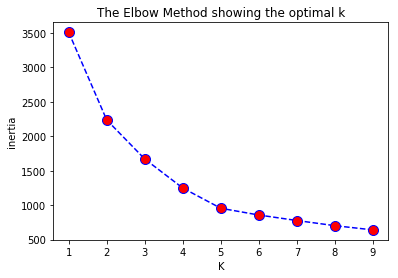

In [9]:
wss = kmeans_elbow_method(X_scaled,10,'inertia')

In [10]:
# Checking for more info on which is the ideal point of elbow
pd.Series(wss).pct_change()
#mean_dist

0         NaN
1   -0.362763
2   -0.253388
3   -0.252499
4   -0.235183
5   -0.102568
6   -0.093100
7   -0.096578
8   -0.087349
dtype: float64

In [11]:
# Chosing the optimal number of clusters as 4

kmeans = KMeans(n_clusters=4)
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Text(2, 0.93, '*')

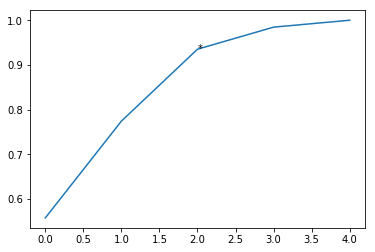

In [13]:
## Almost 93% of information is captured by the first 2 Principal Components.

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.annotate('*',xy=(2,0.93))

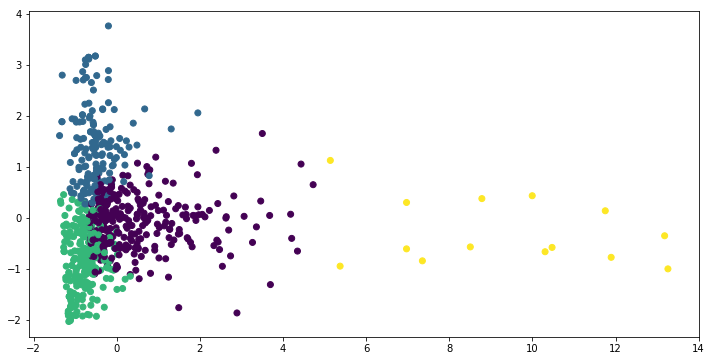

In [14]:
## Reducing variables to 2D Principal Components for visualization

X_pca = PCA(n_components=2).fit_transform(X_scaled)

plt.figure(figsize=(12,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c= kmeans.predict(X_scaled))

In [15]:
X['segments'] = kmeans.labels_

In [16]:
X.groupby('segments').describe()

AVG_Actual_price_12                                         \
                       count         mean          std          min   
segments                                                              
0                      288.0  1701.657864   855.556447   125.000000   
1                      163.0  5325.489141  1536.508710  3145.000000   
2                      237.0  1989.375946  1191.670114    22.500000   
3                       14.0  1834.714562   839.374896  1026.325821   

                                                               \
                  25%          50%          75%           max   
segments                                                        
0         1052.019231  1687.500000  2210.272059   4111.796875   
1         4160.892857  5000.000000  6000.000000  10000.000000   
2         1050.000000  1875.000000  2731.666667   5500.000000   
3         1198.593553  1673.846055  2112.388678   3705.147059   

         MONTH_SINCE_LAST_TRANSACTION              ...     Purchase_Value  \
                                count      mean    ...                75%   
segments                                           ...                      
0                               288.0  2.565972    ...         32773.6875   
1                               163.0  3.938650    ...         20705.9000   
2                               237.0  9.000000    ...          8195.0000   
3                                14.0  1.214286    ...        250888.2500   

                    Total_Discount                                           \
                max          count           mean            std        min   
segments                                                                      
0         191192.12          288.0   27869.838611   36986.222567   -3962.48   
1         131450.00          163.0    2264.238650    4654.231321   -2495.64   
2          41100.00          237.0    5739.567595   10412.069723    -336.71   
3         302721.74           14.0  346442.007143  167015.261663  161040.00   

                                                      
                25%        50%        75%        max  
segments                                              
0           1631.25   14152.75   39200.00  236339.39  
1              0.00     510.00    2190.00   33200.00  
2              0.00     895.00    6539.18   69904.00  
3         225261.13  299851.55  432882.57  734349.82  

[4 rows x 40 columns]

1.1955735379985182

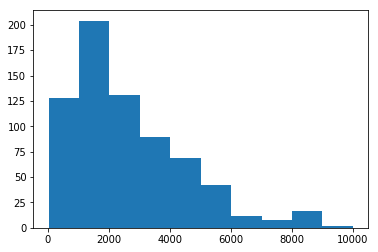

In [17]:
plt.hist(market.AVG_Actual_price_12)
market.AVG_Actual_price_12.kurtosis()

In [18]:
from scipy.stats import shapiro,normaltest,anderson,f_oneway, kruskal

def normality_tests(df,col):
    """Returns the results of Normality tests for Shapiro Wilk,D'Agostino,Anderson
       and seaborn distribution plot of the variable"""
    
    print("Shapiro: ",shapiro(df[col].dropna().sample(30,random_state=0)))
    print()
    print(normaltest(df[col].dropna().sample(30,random_state=0)))
    print()
    print(anderson(df[col].dropna().sample(30,random_state=0)))
    sns.distplot(df[col].dropna())
    plt.show()

Shapiro:  (0.9325822591781616, 0.05752500891685486)

NormaltestResult(statistic=2.3439196123529866, pvalue=0.30975927786275337)

AndersonResult(statistic=0.6095543833244967, critical_values=array([0.521, 0.593, 0.712, 0.83 , 0.988]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


C:\Users\Nithin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


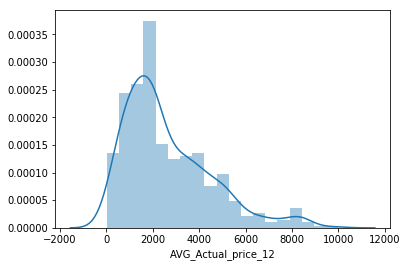

In [19]:
## To check Normality of Average Actual Price variable. Tests suggest borderline normality with p value between 5-10 %. 

normality_tests(market,'AVG_Actual_price_12')

Shapiro:  (0.7010599374771118, 1.6166584373422666e-06)

NormaltestResult(statistic=16.92270905712776, pvalue=0.00021148541354133694)

AndersonResult(statistic=3.6392939574759993, critical_values=array([0.521, 0.593, 0.712, 0.83 , 0.988]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


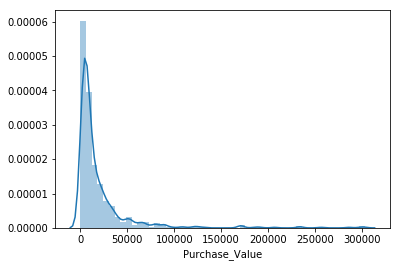

In [20]:
normality_tests(market,'Purchase_Value') ### Heavily Skewed
#market.Purchase_Value.skew()

In [21]:
### CHECKING IF THE CLUSTERS CREATED ARE ACTUALLY DIFFERENT FROM EACH OTHER USING STATISTICAL HYPTHESIS TESTS.


def dictionary_mean(col):

    """Returns a Dictionary containing observations of listed variable based on each cluster """

    d = {}
    for i in X['segments'].unique():
        import pdb
        #pdb.set_trace()
        d[col +'_'+str(i) ] = X[X['segments']==i][col]
        
    return d

In [22]:
## Average Actual Price differs between the clusters significantly.

d = dictionary_mean('AVG_Actual_price_12')

f_oneway(d['AVG_Actual_price_12_0'].sample(14,random_state=2),
        d['AVG_Actual_price_12_1'].sample(14,random_state=2),
        d['AVG_Actual_price_12_2'].sample(14,random_state=2),
       d['AVG_Actual_price_12_3'].sample(14,random_state=2))

F_onewayResult(statistic=44.05223061822929, pvalue=2.6207189872306496e-14)

In [23]:
def cluster_significance_test(test,col):
    
    """Returns the results of the Hypothesis test mentioned for the column.
       Should be called after defining dictionary_mean function.
       Min number of samples is equal to 35 or the no.of samples present in
       the smallest class"""
    
    d = dictionary_mean(col)
    
    x = list(d.keys())
    
    min_length_lst = min([len(d[i]) for i in x])
    
    if min_length_lst<35:
        size = min_length_lst
    else:
        size = 35

    return f_oneway(d[x[0]].sample(size,random_state=2),
                    d[x[1]].sample(size,random_state=2),
                    d[x[2]].sample(size,random_state=2),
                    d[x[3]].sample(size,random_state=2))
    

In [24]:
cluster_significance_test(kruskal,'MONTH_SINCE_LAST_TRANSACTION')

F_onewayResult(statistic=61.22051563357107, pvalue=4.475392474173911e-17)

In [25]:
## CONCLUSION : THE CLUSTERING INDEED SPLIT THE OBSERVATIONS INTO CATEGORIES THAT ARE SIGNIFICANTLY DIFFERENT FROM EACH OTHER.

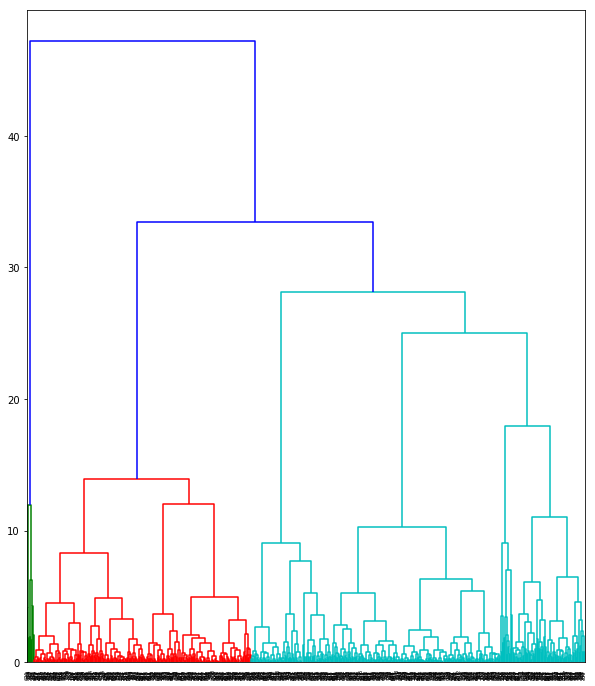

In [26]:
## HIERARCHIAL CLUSTERING

##Importing Dendogram from scipy library.

import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10,12))
dendrogram = sch.dendrogram(sch.linkage(X_scaled,method='ward')) # plotting dendogram, longest uncut line is the topmost one.
                                                                 # cutting which we will get 2 clusters.

In [27]:
## Fitting model with 2 clusters and classifying the datapoints using fit_predict.

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')

y_hc = hc.fit_predict(X_scaled)

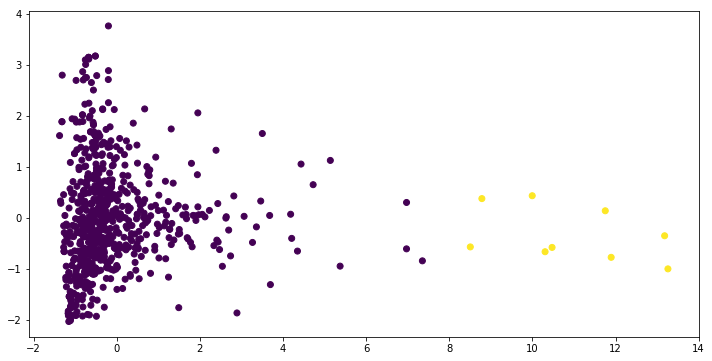

In [28]:
## PCA components plotted with the labels marked. 2 clusters are distinctly apart.

X_pca = PCA(n_components=2).fit_transform(X_scaled)

plt.figure(figsize=(12,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c= y_hc)

In [29]:
## Creating another column with 2 segements.

X['segments2'] = y_hc

In [30]:
## Checking the differences between the clusters for different attributes starting with Avg.actual.price

# Customers of Segment 0 are considerably more active and productive than segment 1

X.groupby('segments2').describe()['AVG_Actual_price_12']

,count,mean,std,min,25%,50%,75%,max
segments2,,,,,,,,
0,693.0,2655.264478,1887.631428,22.500000,1237.500000,2100.000000,3705.147059,10000.000000
1,9.0,1689.112781,410.616014,1026.325821,1310.493827,1678.153649,2055.238095,2163.279221


In [31]:
## Purchase value seems to depict a pattern. Segment 1 customers are at the high end of transactions.

X.groupby('segments2').describe()['Purchase_Value']

,count,mean,std,min,25%,50%,75%,max
segments2,,,,,,,,
0,693.0,16940.017114,23245.318560,45.00,4200.0,8400.0,19920.0,191192.12
1,9.0,241628.080000,48325.251486,170390.16,206681.9,234203.0,286244.5,302721.74


In [32]:
## Number of Items as well shows considerable difference betweeen Segments. Segment 1 buys lots more stuff than Segment 0.

## Could be the case that Segment 1 include wholesale buyers and Segment 0 are retailers.

X.groupby('segments2').describe()['No_of_Items']

,count,mean,std,min,25%,50%,75%,max
segments2,,,,,,,,
0,693.0,9.037518,13.385407,1.0,2.0,4.0,10.0,113.0
1,9.0,140.333333,23.270153,104.0,126.0,146.0,154.0,172.0


In [33]:
## Segment 1 buyers enjoy higher discount in lieu for their heavy purchases.

X.groupby('segments2').describe()['Total_Discount']

,count,mean,std,min,25%,50%,75%,max
segments2,,,,,,,,
0,693.0,16136.372496,36295.311364,-3962.48,0.00,2330.00,16420.0,406350.00
1,9.0,380393.766667,194496.723583,163280.50,211364.84,350467.88,524174.0,734349.82


In [34]:
## Segment 1 players are very active and their month since last transaction on average is way less than retail customers.

X.groupby('segments2').describe()['MONTH_SINCE_LAST_TRANSACTION']

,count,mean,std,min,25%,50%,75%,max
segments2,,,,,,,,
0,693.0,5.080808,3.557430,1.0,2.0,4.0,8.0,12.0
1,9.0,1.111111,0.333333,1.0,1.0,1.0,1.0,2.0


In [35]:
X[X['segments2']==1]  ## Lots of items purchases and at high prices. These are not retail customers for sure!!!

,AVG_Actual_price_12,Purchase_Value,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION,segments,segments2
16,1276.385086,206681.90,172,291783.10,1,3,1
32,1669.538462,185976.00,104,524174.00,1,3,1
67,2163.279221,286244.50,154,163280.50,1,3,1
267,1026.325821,170390.16,149,211364.84,1,3,1
274,1678.153649,298429.24,168,441726.76,1,3,1
327,2131.438872,302721.74,146,350467.88,1,3,1
484,2055.238095,256450.00,126,170200.00,1,3,1
497,1310.493827,234203.00,128,536197.00,1,3,1
691,1891.162000,233556.18,116,734349.82,2,3,1


In [36]:
## CONCLUSION 2: CUSTOMERS CAN BE CLASSIFIED INTO THE RETAILERS AND WHOLE SALE BUYERS/DEALERS. 